In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Task2/sample_dataset.csv")
df


,Age,Salary,Experience,Education_Level,City,Purchase_Made
0,56.0,38392.0,29.0,High School,New York,No
1,NaN,60535.0,34.0,Master,Los Angeles,No
2,32.0,82256.0,6.0,Bachelor,Los Angeles,Yes
3,25.0,65222.0,15.0,PhD,New York,No
4,38.0,93335.0,25.0,Master,Chicago,Yes
...,...,...,...,...,...,...
95,59.0,31802.0,NaN,Master,New York,Yes
96,56.0,38155.0,25.0,Master,Houston,No
97,58.0,69384.0,16.0,High School,Chicago,Yes
98,45.0,77254.0,39.0,PhD,New York,Yes


In [ ]:
# Check for missing values
print(df.isnull().sum())

Age                10
Salary             10
Experience         10
Education_Level     0
City                0
Purchase_Made       0
dtype: int64


In [ ]:
# Impute missing values
#mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
#median
df['Salary'].fillna(df['Salary'].median(), inplace=True)
#mode
df['Experience'].fillna(df['Experience'].mode()[0], inplace=True)
print("\nDataset after Imputation:")
print(df)


Dataset after Imputation:
          Age   Salary  Experience Education_Level         City Purchase_Made
0   56.000000  38392.0        29.0     High School     New York            No
1   38.344444  60535.0        34.0          Master  Los Angeles            No
2   32.000000  82256.0         6.0        Bachelor  Los Angeles           Yes
3   25.000000  65222.0        15.0             PhD     New York            No
4   38.000000  93335.0        25.0          Master      Chicago           Yes
..        ...      ...         ...             ...          ...           ...
95  59.000000  31802.0        32.0          Master     New York           Yes
96  56.000000  38155.0        25.0          Master      Houston            No
97  58.000000  69384.0        16.0     High School      Chicago           Yes
98  45.000000  77254.0        39.0             PhD     New York           Yes
99  24.000000  51918.0        32.0     High School     New York           Yes

[100 rows x 6 columns]


<ipython-input-21-059fdd50f49f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-21-059fdd50f49f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:

# Check for missing values after Imputation
print(df.isnull().sum())


Age                0
Salary             0
Experience         0
Education_Level    0
City               0
Purchase_Made      0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
scaler = MinMaxScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

print("\nDataset after Min-Max Scaling:")
print(df)


Dataset after Min-Max Scaling:
         Age    Salary  Experience Education_Level         City Purchase_Made
0   0.926829  0.118712        29.0     High School     New York            No
1   0.496206  0.439825        34.0          Master  Los Angeles            No
2   0.341463  0.754818         6.0        Bachelor  Los Angeles           Yes
3   0.170732  0.507795        15.0             PhD     New York            No
4   0.487805  0.915484        25.0          Master      Chicago           Yes
..       ...       ...         ...             ...          ...           ...
95  1.000000  0.023145        32.0          Master     New York           Yes
96  0.926829  0.115275        25.0          Master      Houston            No
97  0.975610  0.568151        16.0     High School      Chicago           Yes
98  0.658537  0.682280        39.0             PhD     New York           Yes
99  0.146341  0.314863        32.0     High School     New York           Yes

[100 rows x 6 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Z-score Scaling
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

print("\nDataset after Z-score Scaling:")
print(df)


Dataset after Z-score Scaling:
             Age    Salary  Experience Education_Level         City  \
0   1.509059e+00 -1.359855        29.0     High School     New York   
1  -1.945311e-16 -0.238562        34.0          Master  Los Angeles   
2  -5.422736e-01  0.861362         6.0        Bachelor  Los Angeles   
3  -1.140579e+00 -0.001218        15.0             PhD     New York   
4  -2.944042e-02  1.422388        25.0          Master      Chicago   
..           ...       ...         ...             ...          ...   
95  1.765476e+00 -1.693564        32.0          Master     New York   
96  1.509059e+00 -1.371856        25.0          Master      Houston   
97  1.680004e+00  0.209540        16.0     High School      Chicago   
98  5.688650e-01  0.608067        39.0             PhD     New York   
99 -1.226051e+00 -0.674915        32.0     High School     New York   

   Purchase_Made  
0             No  
1             No  
2            Yes  
3             No  
4            Yes  
.

In [ ]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Education_Level'], prefix=['Edu'])

print("\nDataset after One-Hot Encoding:")
print(df)


Dataset after One-Hot Encoding:
             Age    Salary  Experience         City Purchase_Made  \
0   1.509059e+00 -1.359855        29.0     New York            No   
1  -1.945311e-16 -0.238562        34.0  Los Angeles            No   
2  -5.422736e-01  0.861362         6.0  Los Angeles           Yes   
3  -1.140579e+00 -0.001218        15.0     New York            No   
4  -2.944042e-02  1.422388        25.0      Chicago           Yes   
..           ...       ...         ...          ...           ...   
95  1.765476e+00 -1.693564        32.0     New York           Yes   
96  1.509059e+00 -1.371856        25.0      Houston            No   
97  1.680004e+00  0.209540        16.0      Chicago           Yes   
98  5.688650e-01  0.608067        39.0     New York           Yes   
99 -1.226051e+00 -0.674915        32.0     New York           Yes   

    Edu_Bachelor  Edu_High School  Edu_Master  Edu_PhD  
0          False             True       False    False  
1          False        

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

print("\nDataset after Label Encoding:")
print(df)


Dataset after Label Encoding:
             Age    Salary  Experience  City Purchase_Made  Edu_Bachelor  \
0   1.509059e+00 -1.359855        29.0     3            No         False   
1  -1.945311e-16 -0.238562        34.0     2            No         False   
2  -5.422736e-01  0.861362         6.0     2           Yes          True   
3  -1.140579e+00 -0.001218        15.0     3            No         False   
4  -2.944042e-02  1.422388        25.0     0           Yes         False   
..           ...       ...         ...   ...           ...           ...   
95  1.765476e+00 -1.693564        32.0     3           Yes         False   
96  1.509059e+00 -1.371856        25.0     1            No         False   
97  1.680004e+00  0.209540        16.0     0           Yes         False   
98  5.688650e-01  0.608067        39.0     3           Yes         False   
99 -1.226051e+00 -0.674915        32.0     3           Yes         False   

    Edu_High School  Edu_Master  Edu_PhD  
0            

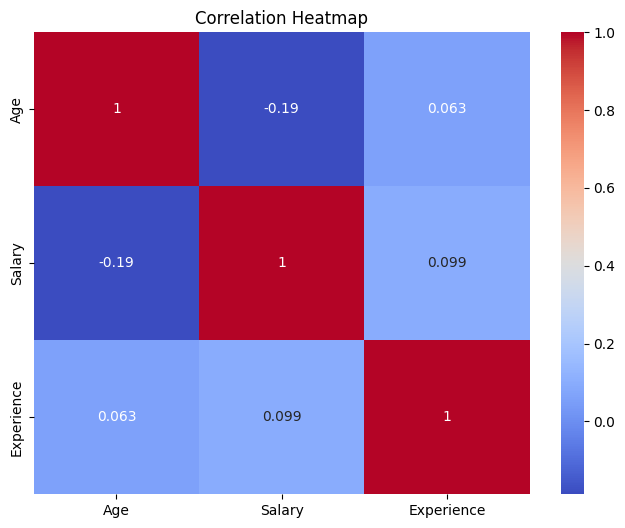

In [ ]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

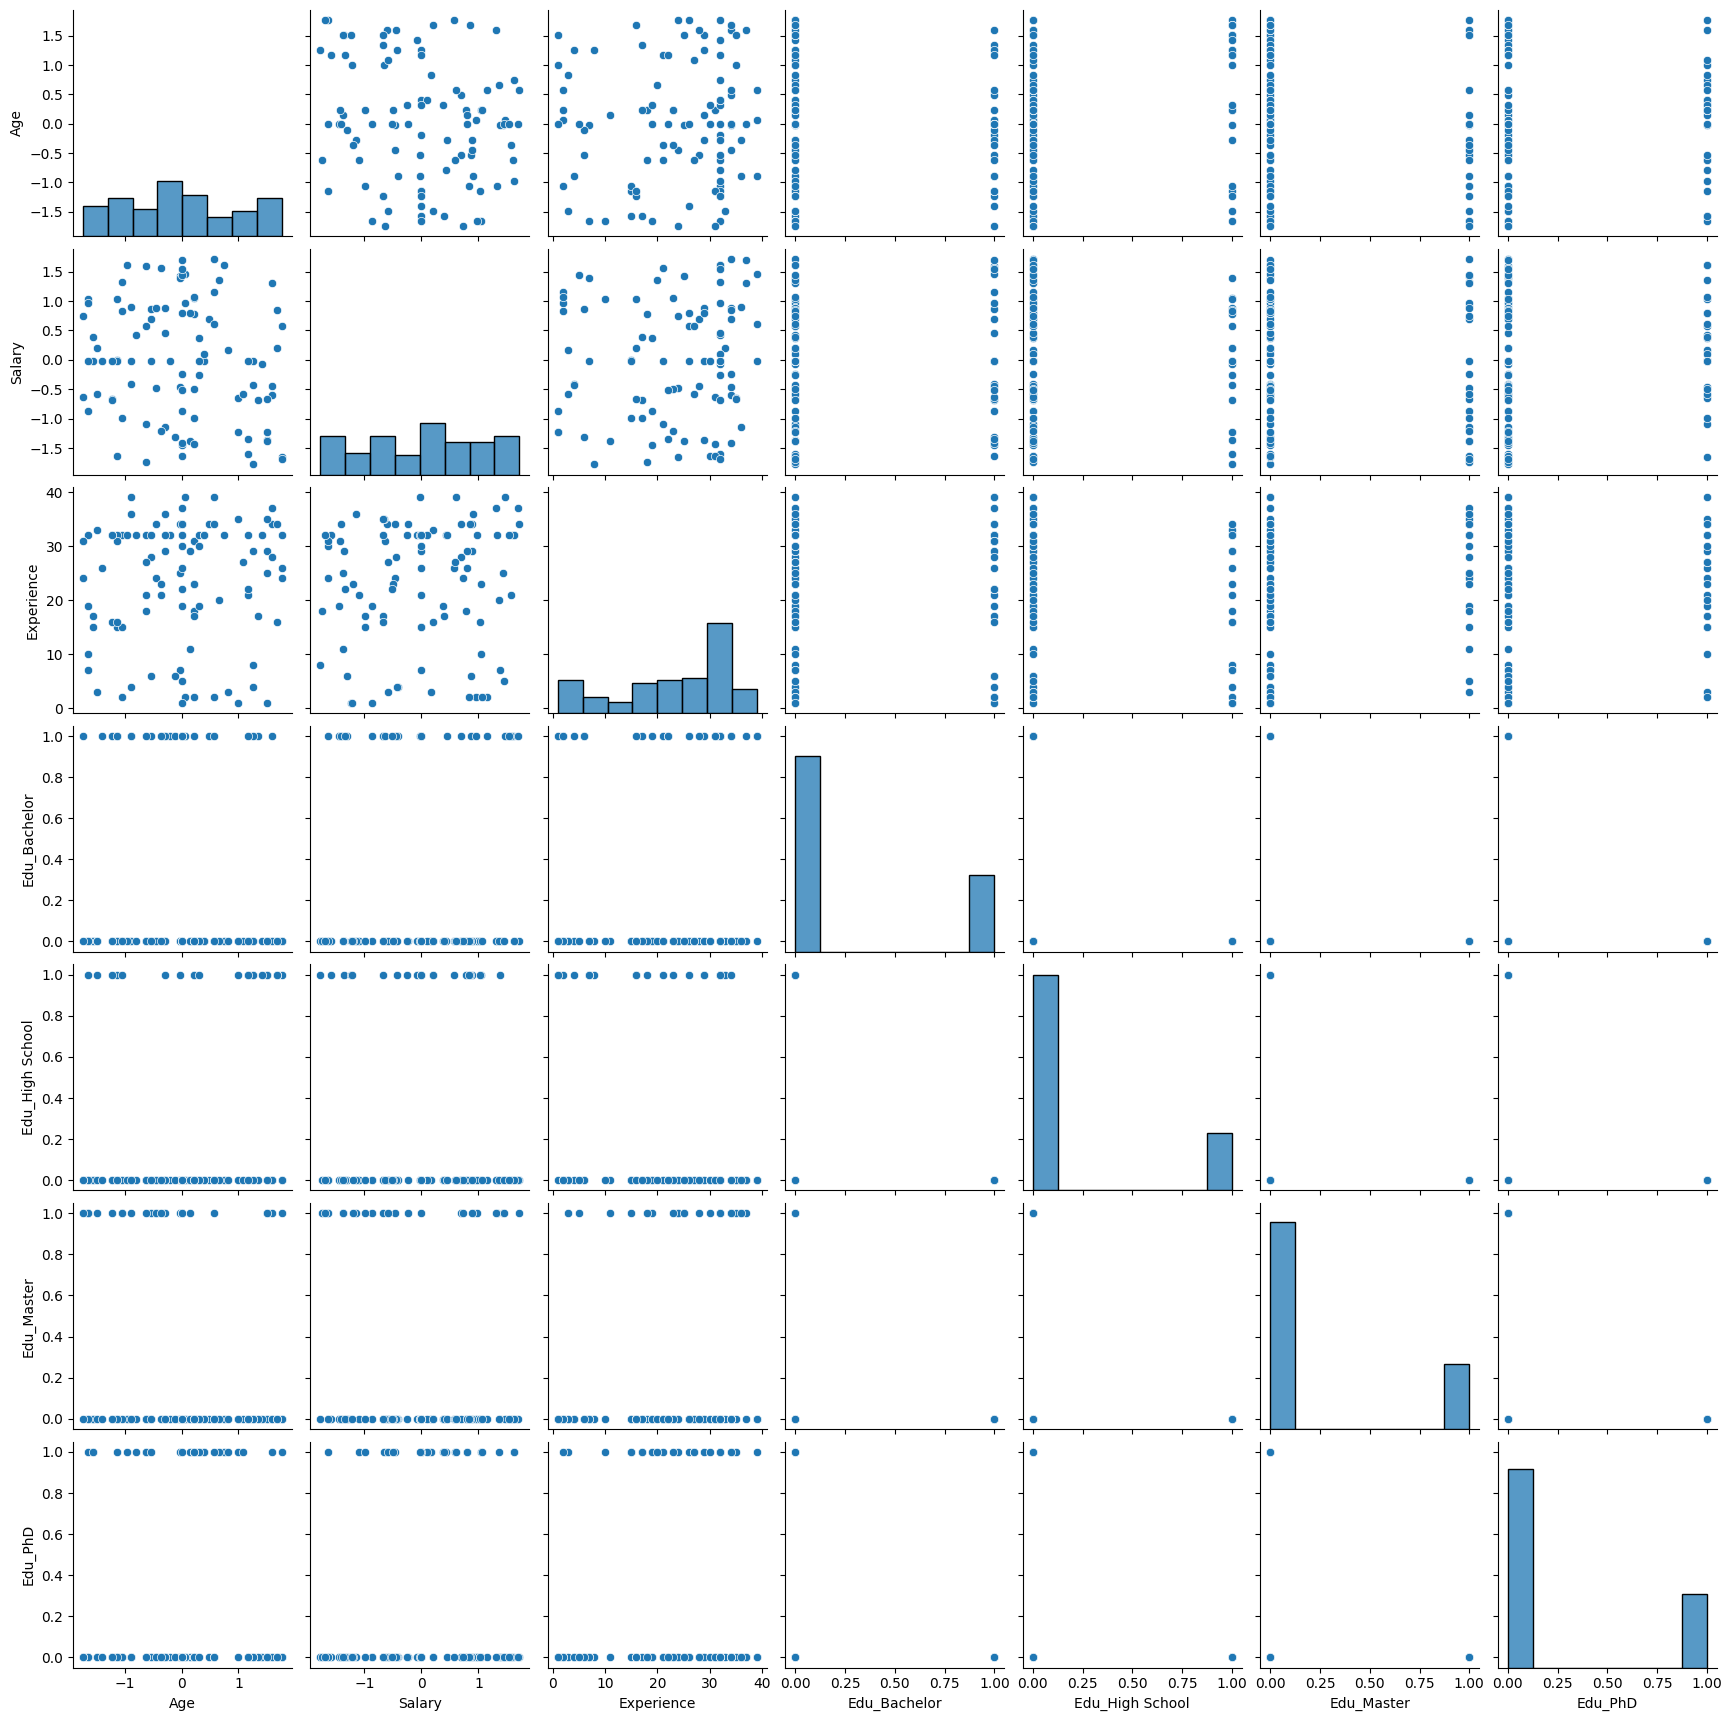

In [ ]:
# Pair Plots
sns.pairplot(df)
plt.show()